# КН-32 Рачинська Анастасія

## Лабораторна робота №1 “Linear Regression”

Мета: навчитись реалізовувати лінійну регресію та градієнтний спуск.

Завдання:
1. Викачати дані з https://drive.google.com/drive/folders/17Xwk2quPb1gFmjG3KVIoZqChrWdcZ8XS?usp=sharing
2. Реалізувати лінійну регресію, яка за допомогою даних з колонки “x” прогнозує значення в колонці “y” (перша колонка у файлах - просто індекс, не ознака, не потрібно її використовувати). Тренування алгоритму повинно відбуватись лише на даних з train датасету. Test датасет слугує для перевірки якості вже натренованої моделі.
    - Візуалізувати дані з lab1_train.csv.
    - Після кожної епохи виводити поточні значення ваг та функції втрат. Використовувати Mean Squared Error як функцію втрат.
    - Після того, як градієнтний спуск зійшовся, порахувати функцію втрат на тестових даних з lab1_test.csv.
    - Візуалізувати на одному графіку дані з lab1_train.csv,  lab1_test.csv та лінію, до якої зійшовся розв’язок.

## Хід роботи

Для початку заванатжимо всі необхідні бібліотеки:

In [19]:
import numpy as np
import matplotlib.pyplot as plt

Тепер викачаємо дані з тренувального сету "lab_1_train.csv":

In [20]:
train_data = np.loadtxt("lab_1_train.csv", delimiter=",", skiprows=1)
train_data_processed = train_data[:,[1,2]]

Візуалізуємо дані з lab1_train.csv:

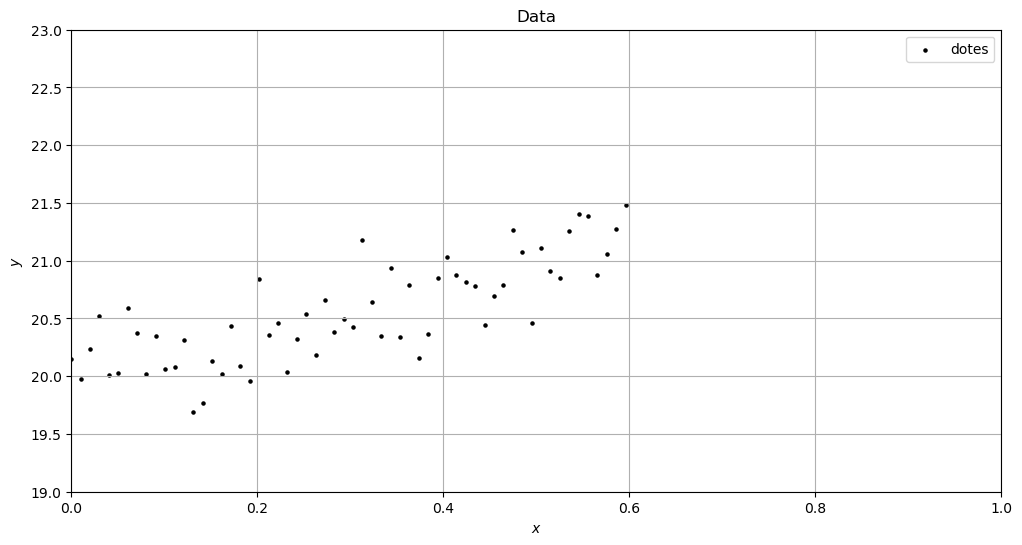

In [21]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)
ax.grid(True)
ax.set_xlim(0,1)
ax.set_ylim(19,23)
x_vals_train = [i[0] for i in train_data_processed] 
y_vals_train = [i[1] for i in train_data_processed]
ax.scatter(x_vals_train, y_vals_train, zorder=1, color='black', label="dotes", s=5)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('Data')
plt.legend()
plt.show(block=False)

Далі пропишемо функції MeanSquareError та реалізуємо лінійну регресію з градієнтним спуском:

In [47]:
def MeanSquareError(data, b0, b1):
    return sum((y - (b0 + b1 * x))**2 for x, y in data) / data.shape[0]
    
def LinearRegression(data, b0, b1, alfa, epsilon):
    # порахуємо функцію втрат для початкових даних
    prev_cost = MeanSquareError(data, b0, b1)
    print(f"cost_func = {prev_cost:.5f} when b0 = {b0:.5f} and b1 = {b1:.5f}")
    
    # забезпечимо вхід у цикл, що підбиратиме найкращі коефіцієнти
    new_b0 = b0 + epsilon * 2
    new_b1 = b1 + epsilon * 2

    # кількість рядків у датасеті
    m = data.shape[0]

    # число ітерацій
    n=0

    # основний цикл роботи
    while abs(new_b0 - b0) > epsilon and abs(new_b1 - b1) > epsilon:
        n += 1
        b0, b1 = new_b0, new_b1
        
        # розрахунок частини формули з сумою
        temp_sum_for_b0 = temp_sum_for_b1 = 0
        for i in range(m):
            temp = data[i][1] - (b0 + b1 * data[i][0])
            temp_sum_for_b0 += temp
            temp_sum_for_b1 += temp * data[i][0]

        # основні розрахунки за формулою
        new_b0 = b0 + alfa * temp_sum_for_b0 / m
        new_b1 = b1 + alfa * temp_sum_for_b1 / m

        # підготовка до наступної ітерації
        # prev_cost = new_cost
        new_cost = MeanSquareError(data, new_b0, new_b1)
        print(f"n = {n} cost_func = {new_cost:.5f} when b0 = {new_b0:.5f} and b1 = {new_b1:.5f}")
        
    return new_b0, new_b1

Запустимо функцію лінійної регресії для пошуку параметрів b0, b1, взявши їхні початкові значення 22 та 3, коефіцієнт в градієнтному спуску 0.1 та в якості критерію зупинки візьмемо різницю між значеннями функції втрат на двох послідовних кроках (якщо різниця менше заданого epsilon = 0.0001, виходимо):

In [48]:
b0, b1 = LinearRegression(train_data_processed, 22, 3, 0.1, 0.00001)

cost_func = 5.60105 when b0 = 22.00000 and b1 = 3.00000
n = 1 cost_func = 4.46119 when b0 = 21.76558 and b1 = 2.92704
n = 2 cost_func = 3.55645 when b0 = 21.55676 and b1 = 2.86191
n = 3 cost_func = 2.83841 when b0 = 21.37076 and b1 = 2.80378
n = 4 cost_func = 2.26854 when b0 = 21.20509 and b1 = 2.75189
n = 5 cost_func = 1.81626 when b0 = 21.05754 and b1 = 2.70556
n = 6 cost_func = 1.45731 when b0 = 20.92612 and b1 = 2.66418
n = 7 cost_func = 1.17243 when b0 = 20.80908 and b1 = 2.62720
n = 8 cost_func = 0.94634 when b0 = 20.70484 and b1 = 2.59416
n = 9 cost_func = 0.76689 when b0 = 20.61201 and b1 = 2.56461
n = 10 cost_func = 0.62447 when b0 = 20.52935 and b1 = 2.53819
n = 11 cost_func = 0.51144 when b0 = 20.45574 and b1 = 2.51454
n = 12 cost_func = 0.42173 when b0 = 20.39019 and b1 = 2.49337
n = 13 cost_func = 0.35053 when b0 = 20.33183 and b1 = 2.47441
n = 14 cost_func = 0.29401 when b0 = 20.27987 and b1 = 2.45741
n = 15 cost_func = 0.24916 when b0 = 20.23361 and b1 = 2.44216
n = 16 c

Тепер зчитаємо дані з "lab_1_test.csv":

In [49]:
test_data = np.loadtxt("lab_1_test.csv", delimiter=",", skiprows=1)
test_data_processed = test_data[:,[1,2]]

Для перевірки якості вже натренованої моделі порахуємо test_error:

In [50]:
test_error = MeanSquareError(test_data_processed, b0, b1)
print(test_error)

0.0865341185533665


Візуалізуємо результати:

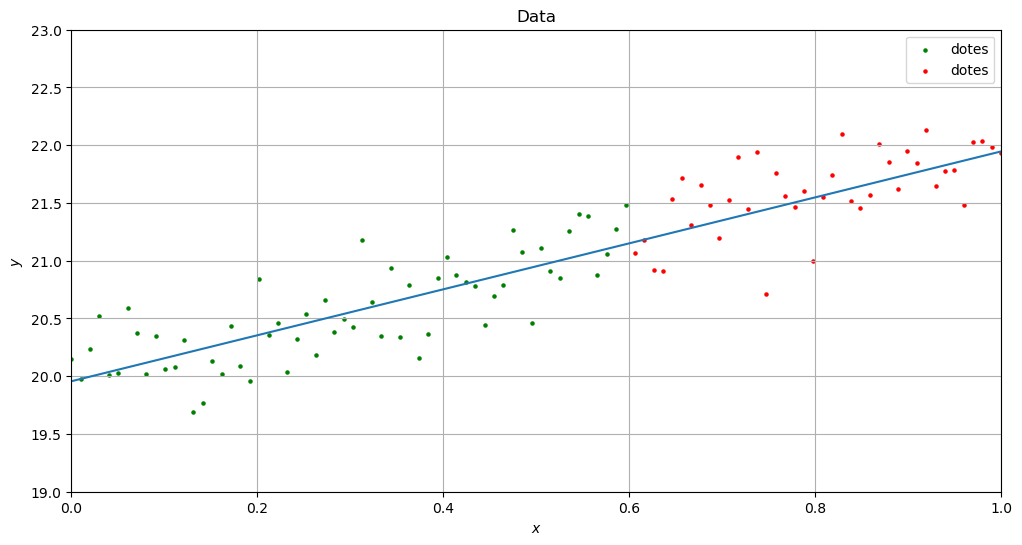

In [41]:
x = np.linspace(0,1,2)
y = b0 + b1 * x
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)
ax.grid(True)
ax.set_xlim(0,1)
ax.set_ylim(19,23)
x_vals_test = [i[0] for i in test_data_processed] 
y_vals_test = [i[1] for i in test_data_processed]
ax.scatter(x_vals_train, y_vals_train, zorder=1, color='green', label="dotes", s=5)
ax.scatter(x_vals_test, y_vals_test, zorder=1, color='red', label="dotes", s=5)
plt.plot(x,y)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('Data')
plt.legend()
plt.show(block=False)

## Висновок
Отже, у ході лабораторної роботи було реалізовано лінійну регресію з градієнтним спуском. Модель було натреновано на файлі "lab_1_train.csv", а протестовано на "lab_1_test.csv". Унаслідок навчання було отрмано коефіцієнти b0 = 19.87657 та b1 = 2.30400. Для тренувальних даних значення функції втрат при цих вагах становить 0.07646. При тестуванні було отримано значення функції втрат 0.092247, що загалом не сильно перевищує отримане внаслідок навчання. Результати показують, що дані добре генералізуються.